# Loads and boundary conditions


The preceding tutorial focused on body forces. However, in situations where you need to apply traction force or a Dirichlet Boundary Condition (DBC) to specific parts of the mesh, this tutorial will address those scenarios.

In [417]:
from dolfin import *

# Mesh entities
Conceptually, a mesh (modeled by the class Mesh), consists of a collection of mesh entities. A mesh entity is a pair (d, i), where d is the topological dimension of the mesh entity and i is a unique index of the mesh entity. Mesh entities are numbered within each topological dimension from 0 to nd − 1, where nd is the number of mesh entities of topological dimension d.

| Entity               | Dimension           | 
| -------------------- | ------------------- |
| Vertex | 0             |
| Edge        | 1             |
|     Face   | 2             |
|    Facet    | D-1           |
|    Cell    | D             |

In [438]:
length, depth = .6, .200
num_ele_along_depth = 10
ele_size = depth/num_ele_along_depth
mesh = RectangleMesh(Point(0, 0), Point(length, depth),
                     int(length/ele_size), int(depth/ele_size))

In [439]:
V = FunctionSpace(mesh, 'CG', 1)
U = VectorFunctionSpace(mesh, 'CG', 1)
T0 = TensorFunctionSpace(mesh, 'DG', 0)

In [440]:
dim = mesh.topology().dim()

<?xml version="1.0" encoding="UTF-8" standalone="no"?><!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd"><svg width="80%" height="80%" viewBox="0 0 619 263" version="1.1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:space="preserve" xmlns:serif="http://www.serif.com/" style="fill-rule:evenodd;clip-rule:evenodd;stroke-linejoin:round;stroke-miterlimit:2;"><rect id="Artboard1" x="0" y="0" width="619" height="262.868" style="fill:#fff;"/><rect x="87.158" y="52.597" width="514.14" height="171.38" style="fill:#b9b9b9;"/><rect x="74.305" y="44.532" width="12.854" height="187.51" style="fill:#3f4a47;"/><path d="M601.298,52.597l0,-12.854l-85.69,0l0,12.854l85.69,-0Z" style="fill:#3f4a47;"/><g><path d="M342.541,250.485c-1.631,0 -3.045,-0.339 -4.242,-1.019c-1.197,-0.679 -2.119,-1.673 -2.764,-2.98c-0.645,-1.308 -0.968,-2.921 -0.968,-4.84c0,-2.055 0.386,-3.796 1.159,-5.223c0.773,-1.426 1.843,-2.513 3.21,-3.26c1.367,-0.748 2.942,-1.121 4.726,-1.121c0.951,-0 1.859,0.102 2.725,0.305c0.866,0.204 1.614,0.51 2.242,0.917l-1.528,3.032c-0.493,-0.34 -1.019,-0.573 -1.58,-0.701c-0.56,-0.127 -1.146,-0.191 -1.758,-0.191c-1.545,0 -2.768,0.467 -3.668,1.401c-0.9,0.934 -1.35,2.319 -1.35,4.153c-0,0.305 0.004,0.645 0.013,1.019c0.008,0.373 0.055,0.747 0.14,1.121l-1.147,-1.07c0.323,-0.663 0.739,-1.219 1.249,-1.669c0.509,-0.45 1.116,-0.79 1.821,-1.019c0.705,-0.229 1.482,-0.344 2.331,-0.344c1.155,0 2.191,0.23 3.108,0.688c0.917,0.459 1.652,1.104 2.204,1.936c0.551,0.832 0.827,1.809 0.827,2.93c0,1.206 -0.301,2.254 -0.904,3.146c-0.603,0.891 -1.41,1.579 -2.42,2.063c-1.01,0.484 -2.153,0.726 -3.426,0.726Zm-0.23,-3.082c0.578,-0 1.092,-0.106 1.542,-0.319c0.45,-0.212 0.802,-0.522 1.057,-0.929c0.255,-0.408 0.382,-0.875 0.382,-1.401c-0,-0.816 -0.276,-1.465 -0.828,-1.949c-0.552,-0.484 -1.286,-0.726 -2.204,-0.726c-0.611,-0 -1.146,0.114 -1.604,0.344c-0.459,0.229 -0.82,0.543 -1.083,0.942c-0.263,0.399 -0.395,0.862 -0.395,1.389c0,0.509 0.127,0.963 0.382,1.362c0.255,0.4 0.612,0.714 1.07,0.943c0.459,0.229 1.019,0.344 1.681,0.344Z" style="fill:#3b3b3b;fill-rule:nonzero;"/><path d="M358.437,250.485c-1.461,0 -2.768,-0.361 -3.923,-1.082c-1.155,-0.722 -2.064,-1.771 -2.726,-3.146c-0.662,-1.376 -0.994,-3.04 -0.994,-4.994c0,-1.953 0.332,-3.617 0.994,-4.993c0.662,-1.375 1.571,-2.424 2.726,-3.146c1.155,-0.721 2.462,-1.082 3.923,-1.082c1.477,-0 2.789,0.361 3.936,1.082c1.146,0.722 2.05,1.771 2.713,3.146c0.662,1.376 0.993,3.04 0.993,4.993c0,1.954 -0.331,3.618 -0.993,4.994c-0.663,1.375 -1.567,2.424 -2.713,3.146c-1.147,0.721 -2.459,1.082 -3.936,1.082Zm-0,-3.49c0.696,0 1.303,-0.195 1.821,-0.586c0.518,-0.39 0.926,-1.01 1.223,-1.859c0.297,-0.849 0.446,-1.945 0.446,-3.287c-0,-1.341 -0.149,-2.437 -0.446,-3.286c-0.297,-0.849 -0.705,-1.469 -1.223,-1.859c-0.518,-0.391 -1.125,-0.586 -1.821,-0.586c-0.679,-0 -1.278,0.195 -1.796,0.586c-0.518,0.39 -0.926,1.01 -1.223,1.859c-0.297,0.849 -0.446,1.945 -0.446,3.286c0,1.342 0.149,2.438 0.446,3.287c0.297,0.849 0.705,1.469 1.223,1.859c0.518,0.391 1.117,0.586 1.796,0.586Z" style="fill:#3b3b3b;fill-rule:nonzero;"/><path d="M375.734,250.485c-1.46,0 -2.768,-0.361 -3.923,-1.082c-1.155,-0.722 -2.063,-1.771 -2.726,-3.146c-0.662,-1.376 -0.993,-3.04 -0.993,-4.994c-0,-1.953 0.331,-3.617 0.993,-4.993c0.663,-1.375 1.571,-2.424 2.726,-3.146c1.155,-0.721 2.463,-1.082 3.923,-1.082c1.478,-0 2.79,0.361 3.936,1.082c1.146,0.722 2.051,1.771 2.713,3.146c0.662,1.376 0.994,3.04 0.994,4.993c-0,1.954 -0.332,3.618 -0.994,4.994c-0.662,1.375 -1.567,2.424 -2.713,3.146c-1.146,0.721 -2.458,1.082 -3.936,1.082Zm0,-3.49c0.696,0 1.304,-0.195 1.822,-0.586c0.518,-0.39 0.925,-1.01 1.222,-1.859c0.298,-0.849 0.446,-1.945 0.446,-3.287c0,-1.341 -0.148,-2.437 -0.446,-3.286c-0.297,-0.849 -0.704,-1.469 -1.222,-1.859c-0.518,-0.391 -1.126,-0.586 -1.822,-0.586c-0.679,-0 -1.278,0.195 -1.796,0.586c-0.518,0.39 -0.925,1.01 -1.223,1.859c-0.297,0.849 -0.445,1.945 -0.445,3.286c-0,1.342 0.148,2.438 0.445,3.287c0.298,0.849 0.705,1.469 1.223,1.859c0.518,0.391 1.117,0.586 1.796,0.586Z" style="fill:#3b3b3b;fill-rule:nonzero;"/></g><g><path d="M12.132,147.203l-0,-2.675l6.878,-6.496c0.543,-0.493 0.942,-0.934 1.197,-1.325c0.255,-0.39 0.429,-0.747 0.522,-1.07c0.094,-0.322 0.141,-0.62 0.141,-0.891c-0,-0.714 -0.242,-1.261 -0.726,-1.643c-0.485,-0.383 -1.194,-0.574 -2.128,-0.574c-0.747,0 -1.439,0.145 -2.076,0.434c-0.637,0.288 -1.176,0.738 -1.617,1.35l-3.006,-1.936c0.679,-1.019 1.63,-1.826 2.853,-2.421c1.222,-0.594 2.632,-0.891 4.229,-0.891c1.324,-0 2.483,0.216 3.477,0.649c0.993,0.434 1.766,1.041 2.318,1.822c0.552,0.781 0.828,1.715 0.828,2.802c-0,0.578 -0.072,1.151 -0.217,1.72c-0.144,0.569 -0.433,1.167 -0.866,1.796c-0.433,0.628 -1.065,1.333 -1.898,2.114l-5.706,5.375l-0.79,-1.503l10.063,0l-0,3.363l-13.476,-0Z" style="fill:#3b3b3b;fill-rule:nonzero;"/><path d="M34.957,147.509c-1.461,-0 -2.768,-0.361 -3.923,-1.083c-1.155,-0.722 -2.064,-1.771 -2.726,-3.146c-0.662,-1.376 -0.993,-3.04 -0.993,-4.993c-0,-1.953 0.331,-3.618 0.993,-4.993c0.662,-1.376 1.571,-2.425 2.726,-3.146c1.155,-0.722 2.462,-1.083 3.923,-1.083c1.478,-0 2.79,0.361 3.936,1.083c1.146,0.721 2.051,1.77 2.713,3.146c0.662,1.375 0.993,3.04 0.993,4.993c0,1.953 -0.331,3.617 -0.993,4.993c-0.662,1.375 -1.567,2.424 -2.713,3.146c-1.146,0.722 -2.458,1.083 -3.936,1.083Zm0,-3.49c0.696,-0 1.303,-0.196 1.821,-0.586c0.518,-0.391 0.926,-1.011 1.223,-1.86c0.297,-0.849 0.446,-1.945 0.446,-3.286c0,-1.342 -0.149,-2.437 -0.446,-3.287c-0.297,-0.849 -0.705,-1.469 -1.223,-1.859c-0.518,-0.391 -1.125,-0.586 -1.821,-0.586c-0.679,-0 -1.278,0.195 -1.796,0.586c-0.518,0.39 -0.926,1.01 -1.223,1.859c-0.297,0.85 -0.446,1.945 -0.446,3.287c0,1.341 0.149,2.437 0.446,3.286c0.297,0.849 0.705,1.469 1.223,1.86c0.518,0.39 1.117,0.586 1.796,0.586Z" style="fill:#3b3b3b;fill-rule:nonzero;"/><path d="M52.254,147.509c-1.46,-0 -2.768,-0.361 -3.923,-1.083c-1.155,-0.722 -2.063,-1.771 -2.726,-3.146c-0.662,-1.376 -0.993,-3.04 -0.993,-4.993c-0,-1.953 0.331,-3.618 0.993,-4.993c0.663,-1.376 1.571,-2.425 2.726,-3.146c1.155,-0.722 2.463,-1.083 3.923,-1.083c1.478,-0 2.79,0.361 3.936,1.083c1.147,0.721 2.051,1.77 2.713,3.146c0.663,1.375 0.994,3.04 0.994,4.993c-0,1.953 -0.331,3.617 -0.994,4.993c-0.662,1.375 -1.566,2.424 -2.713,3.146c-1.146,0.722 -2.458,1.083 -3.936,1.083Zm0,-3.49c0.697,-0 1.304,-0.196 1.822,-0.586c0.518,-0.391 0.925,-1.011 1.223,-1.86c0.297,-0.849 0.445,-1.945 0.445,-3.286c0,-1.342 -0.148,-2.437 -0.445,-3.287c-0.298,-0.849 -0.705,-1.469 -1.223,-1.859c-0.518,-0.391 -1.125,-0.586 -1.822,-0.586c-0.679,-0 -1.278,0.195 -1.796,0.586c-0.518,0.39 -0.925,1.01 -1.222,1.859c-0.298,0.85 -0.446,1.945 -0.446,3.287c-0,1.341 0.148,2.437 0.446,3.286c0.297,0.849 0.704,1.469 1.222,1.86c0.518,0.39 1.117,0.586 1.796,0.586Z" style="fill:#3b3b3b;fill-rule:nonzero;"/></g><g><path d="M540.328,32.126l-0,-16.304l1.783,1.784l-5.35,-0l0,-3.312l7.694,0l-0,17.832l-4.127,0Z" style="fill:#3b3b3b;fill-rule:nonzero;"/><path d="M555.205,32.432c-1.46,-0 -2.768,-0.361 -3.923,-1.083c-1.155,-0.721 -2.063,-1.77 -2.726,-3.146c-0.662,-1.375 -0.993,-3.04 -0.993,-4.993c-0,-1.953 0.331,-3.617 0.993,-4.993c0.663,-1.376 1.571,-2.424 2.726,-3.146c1.155,-0.722 2.463,-1.083 3.923,-1.083c1.478,0 2.79,0.361 3.936,1.083c1.146,0.722 2.051,1.77 2.713,3.146c0.662,1.376 0.993,3.04 0.993,4.993c0,1.953 -0.331,3.618 -0.993,4.993c-0.662,1.376 -1.567,2.425 -2.713,3.146c-1.146,0.722 -2.458,1.083 -3.936,1.083Zm0,-3.49c0.696,-0 1.304,-0.195 1.822,-0.586c0.517,-0.391 0.925,-1.01 1.222,-1.86c0.297,-0.849 0.446,-1.944 0.446,-3.286c0,-1.342 -0.149,-2.437 -0.446,-3.286c-0.297,-0.849 -0.705,-1.469 -1.222,-1.86c-0.518,-0.39 -1.126,-0.586 -1.822,-0.586c-0.679,0 -1.278,0.196 -1.796,0.586c-0.518,0.391 -0.925,1.011 -1.223,1.86c-0.297,0.849 -0.445,1.944 -0.445,3.286c-0,1.342 0.148,2.437 0.445,3.286c0.298,0.85 0.705,1.469 1.223,1.86c0.518,0.391 1.117,0.586 1.796,0.586Z" style="fill:#3b3b3b;fill-rule:nonzero;"/><path d="M572.502,32.432c-1.46,-0 -2.768,-0.361 -3.923,-1.083c-1.155,-0.721 -2.063,-1.77 -2.726,-3.146c-0.662,-1.375 -0.993,-3.04 -0.993,-4.993c-0,-1.953 0.331,-3.617 0.993,-4.993c0.663,-1.376 1.571,-2.424 2.726,-3.146c1.155,-0.722 2.463,-1.083 3.923,-1.083c1.478,0 2.79,0.361 3.936,1.083c1.147,0.722 2.051,1.77 2.713,3.146c0.663,1.376 0.994,3.04 0.994,4.993c-0,1.953 -0.331,3.618 -0.994,4.993c-0.662,1.376 -1.566,2.425 -2.713,3.146c-1.146,0.722 -2.458,1.083 -3.936,1.083Zm0,-3.49c0.697,-0 1.304,-0.195 1.822,-0.586c0.518,-0.391 0.925,-1.01 1.223,-1.86c0.297,-0.849 0.445,-1.944 0.445,-3.286c0,-1.342 -0.148,-2.437 -0.445,-3.286c-0.298,-0.849 -0.705,-1.469 -1.223,-1.86c-0.518,-0.39 -1.125,-0.586 -1.822,-0.586c-0.679,0 -1.278,0.196 -1.796,0.586c-0.518,0.391 -0.925,1.011 -1.222,1.86c-0.298,0.849 -0.446,1.944 -0.446,3.286c-0,1.342 0.148,2.437 0.446,3.286c0.297,0.85 0.704,1.469 1.222,1.86c0.518,0.391 1.117,0.586 1.796,0.586Z" style="fill:#3b3b3b;fill-rule:nonzero;"/></g></svg>

## Define the boundaries (Subdomains)

In [460]:
clamped_boundary = CompiledSubDomain("near(x[0],0)")
load_boundary = CompiledSubDomain("near(x[1],0.2) && x[0]>0.5")

## Mark the boundaries on mesh

In [461]:
support_tag, load_tag = 1, 2
mf = MeshFunction("size_t", mesh, 1)
mf.set_all(0)
clamped_boundary.mark(mf,support_tag)
load_boundary.mark(mf,load_tag)

## Visualize the boundaries

In [462]:
with XDMFFile("input/subdomains.xdmf") as outfile:
    outfile.write(mf)

In [463]:
bc = DirichletBC(U, Constant((0,)*dim), clamped_boundary)

In [464]:
E, nu = 2e11, 0.3
rho, g = 7800, 9.81

$$
\begin{align}
\sigma &= \lambda\,\hbox{tr}\,(\varepsilon) I + 2\mu\varepsilon,\\
\varepsilon &= \frac{1}{2}\left(\nabla u + (\nabla u)^{\top}\right),
\end{align}
$$


In [465]:
lmbda = (E * nu) / ((1 + nu) * (1 - 2 * nu))
mu = E / (2 * (1 + nu))


def epsilon(u):
    return 0.5*(grad(u) + grad(u).T)


def sigma(u):
    return lmbda*tr(epsilon(u))*Identity(dim) + 2*mu*epsilon(u)

In [466]:
# Define variational problem
u, v = TrialFunction(U), TestFunction(U)

In [467]:
f = Constant((0, -rho*g))

In [468]:
ds = Measure("ds",subdomain_data=mf)

In [469]:
a = inner(sigma(u), epsilon(v))*dx
t = Constant((0,100))
L = dot(f, v)*dx + dot(t,v)*ds(load_tag)

# Compute solution
u = Function(U)
solve(a == L, u, bc)

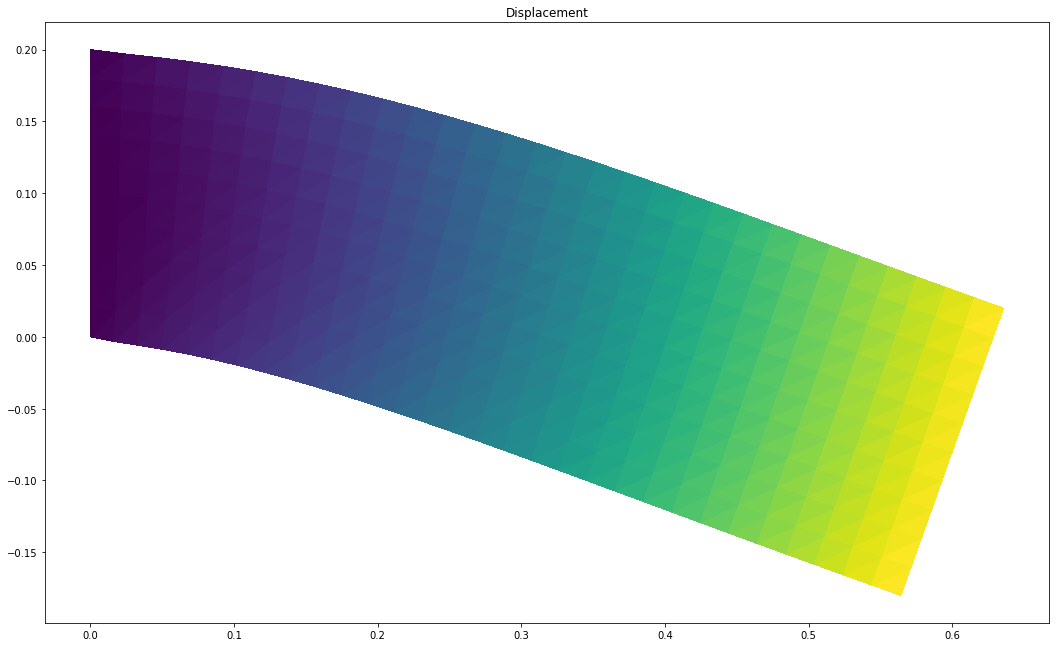

In [470]:
plt.figure(figsize=(18, 16))
# Plot solution
scale_factor = 1e5
plot(u*scale_factor, title='Displacement', mode='displacement')

In [471]:
u.vector().min()

-1.8010419648112784e-06

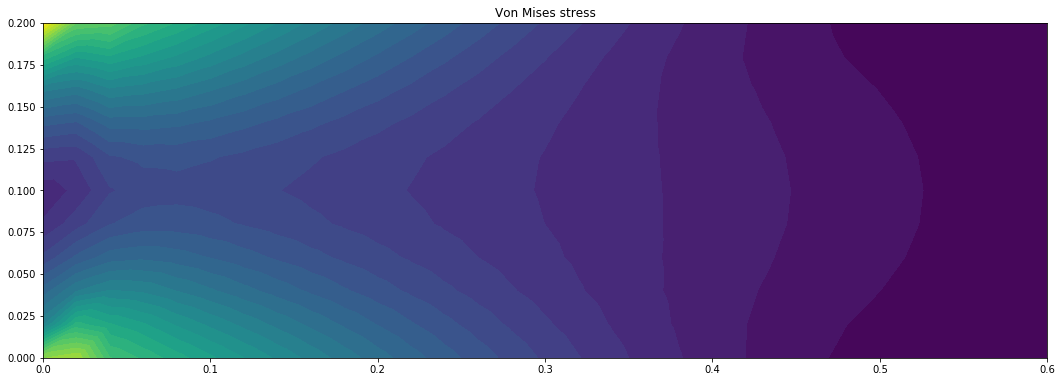

In [472]:
plt.figure(figsize=(18, 16))
# Plot stress
s = sigma(u) - (1./3)*tr(sigma(u))*Identity(dim)  # deviatoric stress
von_Mises = sqrt(3./2*inner(s, s))
von_Mises = project(von_Mises, V)
plot(von_Mises, title='Von Mises stress')

min/max u: -5.71041349380966e-13 1.8360022678476485e-06


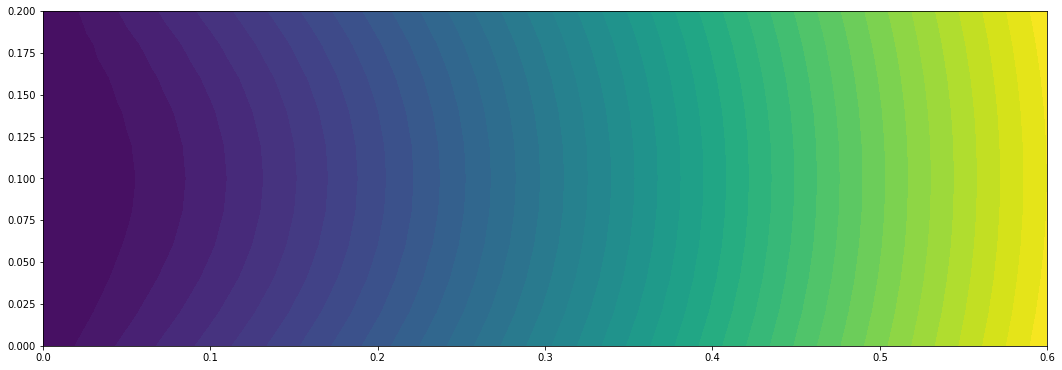

In [473]:
plt.figure(figsize=(18, 16))
# Compute magnitude of displacement
u_magnitude = sqrt(dot(u, u))
u_magnitude = project(u_magnitude, V)
plot(u_magnitude, 'Displacement magnitude')
print('min/max u:',
      u_magnitude.vector().vec().array.min(),
      u_magnitude.vector().vec().array.max())

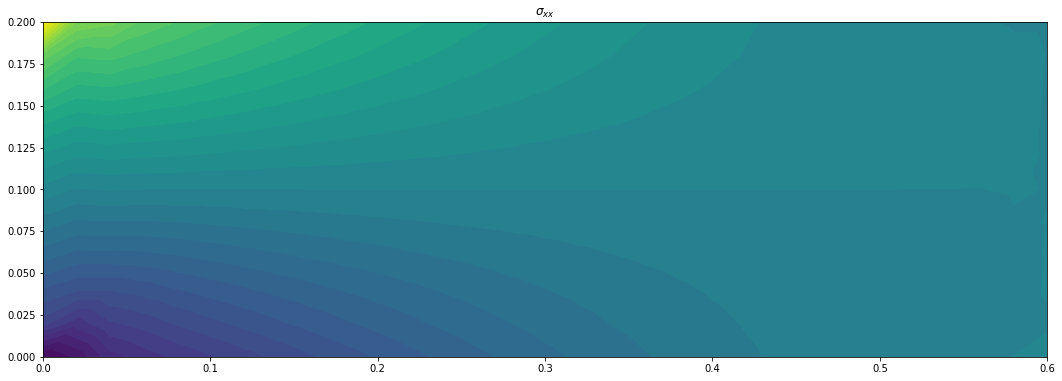

In [474]:
stress = project(sigma(u),T0)
plt.figure(figsize=(18, 16))
plot(stress[0,0], title='$\sigma_{xx}$')

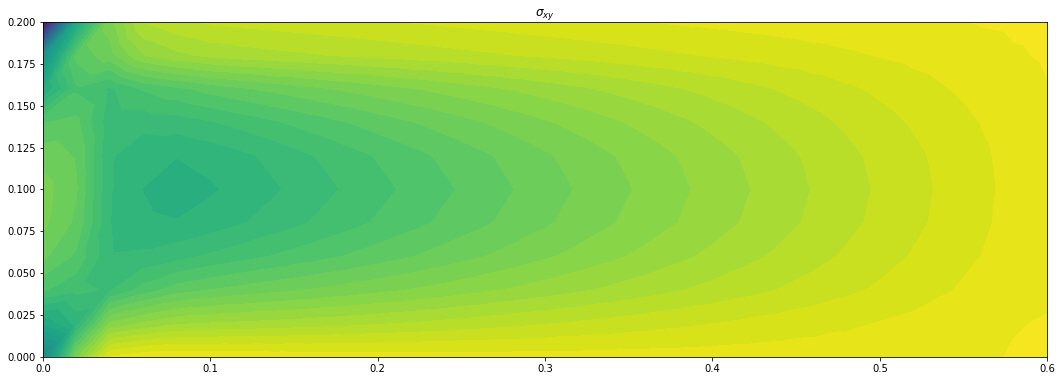

In [475]:
plt.figure(figsize=(18, 16))
plot(stress[0,1], title='$\sigma_{xy}$')

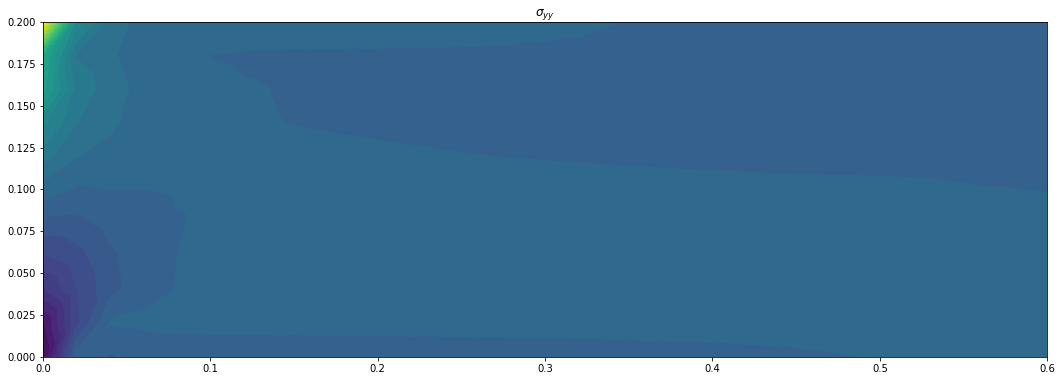

In [476]:
plt.figure(figsize=(18, 16))
plot(stress[1,1], title='$\sigma_{yy}$')